In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import erf

In [103]:
data1 = pd.read_csv('../prices/prices_round_4_day_1.csv', header = 0, sep=";")
data2 = pd.read_csv('../prices/prices_round_4_day_2.csv', header = 0, sep=";")
data3 = pd.read_csv('../prices/prices_round_4_day_3.csv', header = 0, sep=";")

# Join rows of data1, data2 and data3
data = pd.concat([data1, data2, data3])
data = data.reset_index(drop=True) # Reset indices
data.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,COCONUT,9999.0,200.0,NaN,NaN,NaN,NaN,10001,200,NaN,NaN,NaN,NaN,10000.0,0.0
1,1,0,COCONUT_COUPON,637.0,39.0,NaN,NaN,NaN,NaN,638,39,NaN,NaN,NaN,NaN,637.5,0.0
2,1,100,COCONUT,9999.0,104.0,9998.0,44.0,NaN,NaN,10000,104,10001.0,44.0,NaN,NaN,9999.5,0.0
3,1,100,COCONUT_COUPON,637.0,33.0,NaN,NaN,NaN,NaN,638,33,NaN,NaN,NaN,NaN,637.5,0.0
4,1,200,COCONUT,9998.0,133.0,9997.0,62.0,NaN,NaN,9999,133,10000.0,62.0,NaN,NaN,9998.5,0.0


In [104]:
coconut_prices = data[data['product'] == 'COCONUT']['mid_price'].values
coupon_prices = data[data['product'] == 'COCONUT_COUPON']['mid_price'].values
print(f"Length of coupon: {len(coconut_prices)}, std: {np.std(coconut_prices)}, std adjusted for yearly: {np.std(coconut_prices) / np.sqrt(250 * 10000)}")

Length of coupon: 30000, std: 88.75266514702373, std adjusted for yearly: 0.056132114054967576


In [161]:
def calculate_black_scholes(S, sigma = 0.05652, r = 0, T = 1, K = 10000):
        d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = d1 - sigma * np.sqrt(T)
        return S * erf(d1) - K * np.exp(-r * T) * erf(d2)

In [160]:
historic_mean = 637.63
number = 0
while True:
    number += 0.000001
    if calculate_black_scholes(1e4, number) > historic_mean:
        print(f"Number of coconuts: {number}")
        break

Number of coconuts: 0.05652400000003587


In [163]:
calculate_black_scholes(10000)

637.5901683571958

In [164]:
black_scholes_prices = np.array([calculate_black_scholes(x) for x in coconut_prices])

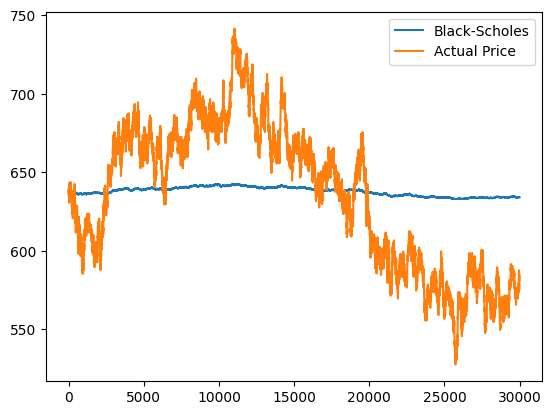

In [165]:
plt.plot(black_scholes_prices, label='Black-Scholes')
plt.plot(coupon_prices, label='Actual Price')
plt.legend()
plt.show()


In [171]:
best_i = 0
best_mse = np.inf
for i in np.linspace(16.192, 16.193, 10000):
    scaled_black_scholes_prices = (black_scholes_prices - historic_mean) * i + historic_mean
    mse = np.mean((scaled_black_scholes_prices - coupon_prices) ** 2)
    if mse < best_mse:
        best_mse = mse
        best_i = i
print(f"Best i: {best_i}, best mse: {best_mse}.")

Best i: 16.192593159315933, best mse: 188.3522513393711.


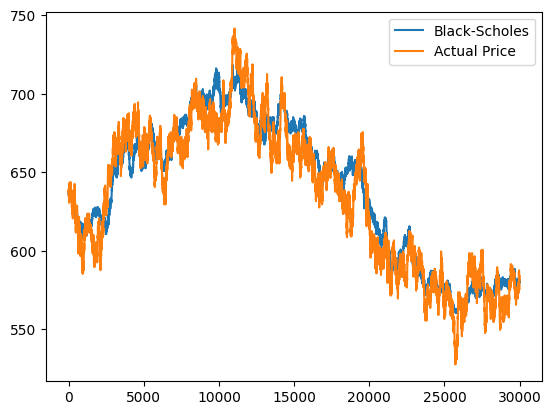

In [172]:
plt.plot((black_scholes_prices - historic_mean) * best_i + historic_mean, label='Black-Scholes')
plt.plot(coupon_prices, label='Actual Price')
plt.legend()
plt.show()

In [176]:
best_i = 0
best_mse = np.inf
for i in np.linspace(0.01,1,100):
    black_scholes_prices = [calculate_black_scholes(x, i) for x in coconut_prices]
    mse = np.mean((scaled_black_scholes_prices - coupon_prices) ** 2)
    if mse < best_mse:
        best_mse = mse
        best_i = i
print(f"Best i: {best_i}, best mse: {best_mse}.")

Best i: 0.01, best mse: 188.352252595277.


C:\Users\Gael Work\AppData\Local\Temp\ipykernel_5992\4141786074.py:2: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
C:\Users\Gael Work\AppData\Local\Temp\ipykernel_5992\4141786074.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))


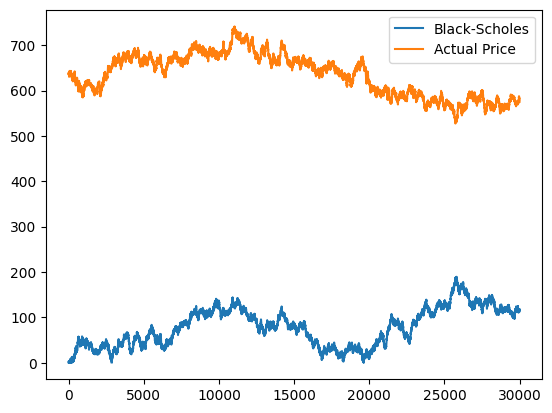

In [186]:
plt.plot([calculate_black_scholes(x, 0.05652, 0, 0.5) for x in coconut_prices], label='Black-Scholes')
plt.plot(coupon_prices, label='Actual Price')
plt.legend()
plt.show()